In [205]:
from packages import *
from functions import *
import datetime as dt
import seaborn as sns


In [4]:
df = pd.read_csv('base_complete_022023.csv')

/tmp/ipykernel_2287/2751547021.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,23,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('base_complete_022023.csv')


In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'tweet_id', 'created_at', 'author_id',
       'author_username', 'author_name', 'author_created_at',
       'author_followers_count', 'author_tweet_count', 'text', 'hashtags',
       'mentions', 'user_mentions.screen_name', 'user_mentions.name', 'emojis',
       'emojis_utf8', 'lang', 'quote_status', 'quoted_status.id',
       'quoted_status.user.id', 'quoted_status.user.screen_name',
       'source_base', 'author_description', 'author_following_count',
       'author_listed_count', 'author_verified', 'geo', 'like_count',
       'quote_count', 'reply_count', 'retweet_count', 'source'],
      dtype='object')

In [33]:
df.source_base

0         ina
1         ina
2         ina
3         ina
4         ina
         ... 
335616    api
335617    api
335618    api
335619    api
335620    api
Name: source_base, Length: 335621, dtype: object

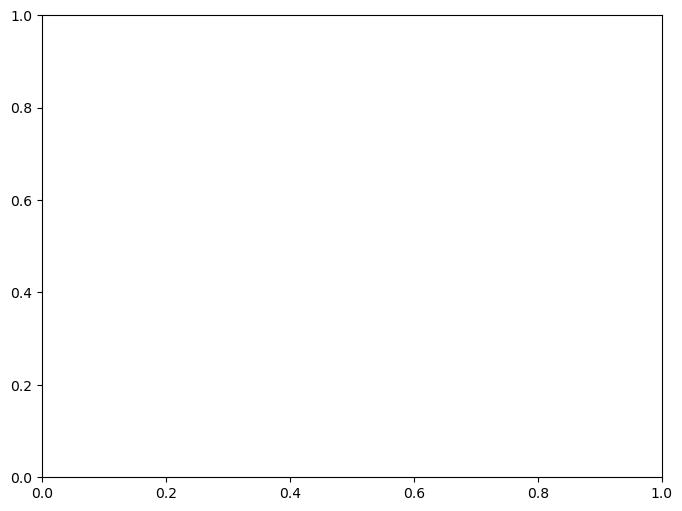

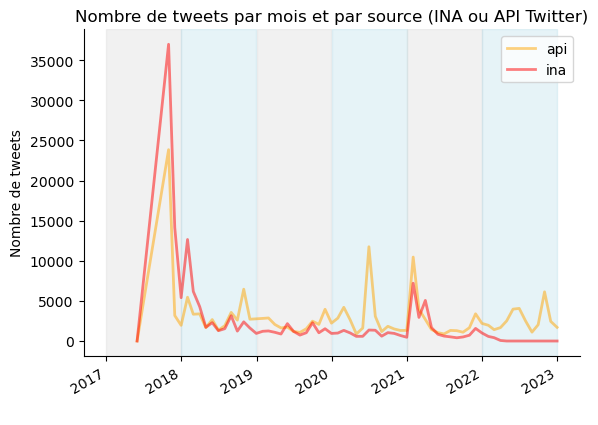

In [231]:

# Sélectionner les tweets à partir de 2017
df = df[df['created_at'] >= '2017-01-01']


# Regrouper par mois et année
pivot_counts = df.groupby([pd.Grouper(key='created_at', freq='M'), 'source_base'])['tweet_id'].count().unstack().fillna(0)

# Créer un graphique avec les options souhaitées
pivot_counts.plot(kind='line', linewidth=2, alpha=0.5, color=['orange', 'red'])
plt.xlabel(' ')
plt.ylabel('Nombre de tweets')
plt.title('Nombre de tweets par mois et par source (INA ou API Twitter)')
plt.grid(False)

### Liste des dates clés
#octobre 2017: metoo et btp
#janvier 2018 : tribune liberté d'importuner
#octobre 2018 : omerta EN
#fevrier 2020 : Cesar, polanski & haenel
#janvier 2021: lancement du MeTooInceste, MeTooGay, Familia Grande
#mai 2022 : mediapart et affaire ppda

dates_clefs = ['2017-10', '2018-01', '2018-10', '2020-02', '2021-01', '2022-05' ]


# Ajouter des traits verticaux à certaines dates clés
#for date in dates_clefs:
#    plt.axvline(x=date, color='gray', linestyle='--', linewidth=1)
#plt.annotate(date, xy=(date, -50),xytext=(date, -50),ha='center', va='center', rotation=45, fontsize=10)

    



# Colorer le fond en fonction de l'année
plt.axvspan('2017-01-01', '2017-12-31', color='lightgray', alpha=0.3)
plt.axvspan('2018-01-01', '2018-12-31', color='lightblue', alpha=0.3)
plt.axvspan('2019-01-01', '2019-12-31', color='lightgray', alpha=0.3)
plt.axvspan('2020-01-01', '2020-12-31', color='lightblue', alpha=0.3)
plt.axvspan('2021-01-01', '2021-12-31', color='lightgray', alpha=0.3)
plt.axvspan('2022-01-01', '2022-12-31', color='lightblue', alpha=0.3)


plt.subplots_adjust(hspace=0.3)

sns.despine()


# Ajoute les graphiques et les légendes ici
plt.legend()
plt.show()



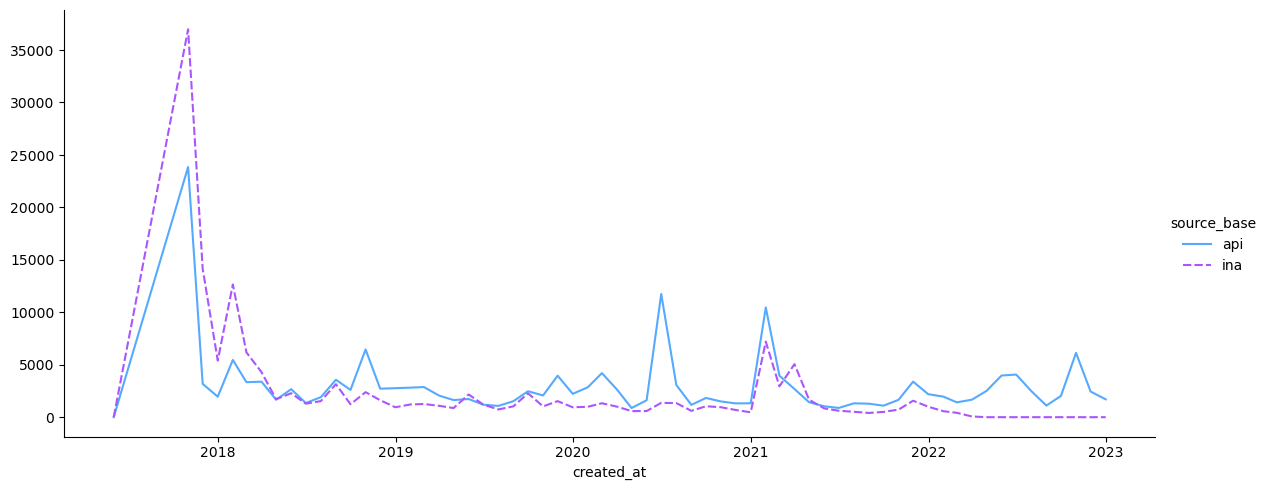

In [216]:
sns.relplot(data=pivot_counts, height=5, aspect=2.4, 
    kind="line",
    palette="cool")